In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.pipeline import Pipeline
import math


In [2]:
# There are total of eight datasets. Reading in all datasets
air_reserve = pd.read_csv('data/air_reserve.csv')
air_store_info = pd.read_csv('data/air_store_info.csv')
air_visit_data = pd.read_csv('data/air_visit_data.csv')
date_info = pd.read_csv('data/date_info.csv')
hpg_reserve = pd.read_csv('data/hpg_reserve.csv')
hpg_store_info = pd.read_csv('data/hpg_store_info.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')
store_id_relation = pd.read_csv('data/store_id_relation.csv')

In [68]:
# Quick visual inspection of data. Checking shape of data, printing sample of rows, data types and missing values

def visual_inspect(data, size):
    print('Shape of dataset:', data.shape)
    print('\n')
    print('Columns in data:', data.columns.tolist())
    display(data.head(size))
    print('Data Types:\n', data.dtypes)
    print('\n')
    print('Missing Values:\n', data.isna().sum(axis=0))

In [69]:
visual_inspect(air_reserve,5)

Shape of dataset: (92378, 5)


Columns in data: ['air_store_id', 'visit_datetime', 'reserve_datetime', 'visitors', 'visit_date']


,air_store_id,visit_datetime,reserve_datetime,visitors,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01


Data Types:
 air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime            object
visitors                     int64
visit_date                  object
dtype: object


Missing Values:
 air_store_id        0
visit_datetime      0
reserve_datetime    0
visitors            0
visit_date          0
dtype: int64


In [5]:
visual_inspect(air_store_info,5)

Shape of dataset: (829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


Data Types:
 air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object


Missing Values:
 air_store_id      0
air_genre_name    0
air_area_name     0
latitude          0
longitude         0
dtype: int64


In [20]:
visual_inspect(air_visit_data,5)

Shape of dataset: (252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


Data Types:
 air_store_id    object
visit_date      object
visitors         int64
dtype: object


In [7]:
# Merging datasets. There are three datasets within AIR system with air_store_id 
# as unique identifier to be used for merging datasets.
# air_visit_data has visit_date and visitors columns. We'll create visit_date in air_reserve dataset and
# rename reserve_vistiors column.

air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['visit_date'] = air_reserve['visit_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Rename columns so they match during merge
air_reserve.rename(columns={'reserve_visitors': 'visitors'}, inplace=True)
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,visitors,visit_date
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01


In [8]:
print('Shape of air_reserve:', air_reserve.shape)
print('Shape of air_visit:', air_visit_data.shape)
print('Shape of air_store_info:', air_store_info.shape)
df = pd.merge(air_visit_data, air_reserve, on = ['air_store_id', 'visit_date', 'visitors'], how = 'outer')
df_air = pd.merge(df, air_store_info, on = ['air_store_id'], how = 'outer')
visual_inspect(df_air, 5)

Shape of air_reserve: (92378, 5)
Shape of air_visit: (252108, 3)
Shape of air_store_info: (829, 5)
Shape of dataset: (343508, 9)


,air_store_id,visit_date,visitors,visit_datetime,reserve_datetime,air_genre_name,air_area_name,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,NaT,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,NaT,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,NaT,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,NaT,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,NaT,NaN,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


Data Types:
 air_store_id                object
visit_date                  object
visitors                     int64
visit_datetime      datetime64[ns]
reserve_datetime            object
air_genre_name              object
air_area_name               object
latitude                   float64
longitude                  float64
dtype: object


Missing Values:
 air_store_id             0
visit_date               0
visitors                 0
visit_datetime      251130
reserve_datetime    251130
air_genre_name           0
air_area_name            0
latitude                 0
longitude                0
dtype: int64


In [44]:
visual_inspect(hpg_reserve,5)

Shape of dataset: (2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


Data Types:
 hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object


Missing Values:
 hpg_store_id        0
visit_datetime      0
reserve_datetime    0
reserve_visitors    0
dtype: int64


In [45]:
visual_inspect(hpg_store_info,5)

Shape of dataset: (4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


Data Types:
 hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object


Missing Values:
 hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64


In [46]:
visual_inspect(store_id_relation,5)

Shape of dataset: (150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


Data Types:
 air_store_id    object
hpg_store_id    object
dtype: object


Missing Values:
 air_store_id    0
hpg_store_id    0
dtype: int64


In [48]:
visual_inspect(date_info,5)

Shape of dataset: (517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


Data Types:
 calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object


Missing Values:
 calendar_date    0
day_of_week      0
holiday_flg      0
dtype: int64


In [9]:
# Now we'll merge the HPG datasets. Just like AIR data, we'll create a Y-M-D date format column for visit date and rename
# recent_visitors. We'll then merge the two HPG datasets and then append air_store_id from store_id_relation dataset.

hpg_reserve['visit_datetime'] = pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['visit_date'] = hpg_reserve['visit_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
hpg_reserve.rename(columns={'reserve_visitors':'visitors'}, inplace=True)

In [51]:
visual_inspect(hpg_reserve,5)

Shape of dataset: (2000320, 5)


,hpg_store_id,visit_datetime,reserve_datetime,visitors,visit_date
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016-01-01
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016-01-01
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016-01-01
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016-01-01
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016-01-01


Data Types:
 hpg_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime            object
visitors                     int64
visit_date                  object
dtype: object


Missing Values:
 hpg_store_id        0
visit_datetime      0
reserve_datetime    0
visitors            0
visit_date          0
dtype: int64


In [53]:
visual_inspect(hpg_store_info,5)

Shape of dataset: (4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


Data Types:
 hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object


Missing Values:
 hpg_store_id      0
hpg_genre_name    0
hpg_area_name     0
latitude          0
longitude         0
dtype: int64


In [15]:
df_hpg = pd.merge(hpg_reserve, hpg_store_info, on = ['hpg_store_id'], how = 'left')
df_hpg = pd.merge(df_hpg, store_id_relation, on = ['hpg_store_id'], how = 'left')
visual_inspect(df_hpg,5)

Shape of dataset: (2000320, 10)


,hpg_store_id,visit_datetime,reserve_datetime,visitors,visit_date,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,2016-01-01,NaN,NaN,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,2016-01-01,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,2016-01-01,NaN,NaN,NaN,NaN,NaN
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,2016-01-01,NaN,NaN,NaN,NaN,NaN
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,2016-01-01,NaN,NaN,NaN,NaN,NaN


Data Types:
 hpg_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime            object
visitors                     int64
visit_date                  object
hpg_genre_name              object
hpg_area_name               object
latitude                   float64
longitude                  float64
air_store_id                object
dtype: object


Missing Values:
 hpg_store_id              0
visit_datetime            0
reserve_datetime          0
visitors                  0
visit_date                0
hpg_genre_name      1129012
hpg_area_name       1129012
latitude            1129012
longitude           1129012
air_store_id        1972137
dtype: int64


In [16]:
# Printing rows with valid ids
df_valid_ids = df_hpg[df_hpg.air_store_id.notnull() & df_hpg.hpg_store_id.notnull()]
valid_ids_percent = len(df_valid_ids.index) / len(df_hpg.index) * 100
print('% Rows with valid IDS:', round(valid_ids_percent,2), '%')
print('# Rows with valid IDS:', len(df_valid_ids.index))

% Rows with valid IDS: 1.41 %
# Rows with valid IDS: 28183


In [57]:
# Now we'll merge df_air and df_hpg together. First we'll check the columns in both and rename accordingly.

print('Columns in df_air:\n', df_air.columns)
print('Columns in df_hpg:\n', df_hpg.columns)

Columns in df_air:
 Index(['air_store_id', 'visit_date', 'visitors', 'visit_datetime',
       'reserve_datetime', 'air_genre_name', 'air_area_name', 'latitude',
       'longitude'],
      dtype='object')
Columns in df_hpg:
 Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime', 'visitors',
       'visit_date', 'hpg_genre_name', 'hpg_area_name', 'latitude',
       'longitude', 'air_store_id'],
      dtype='object')


In [60]:
df_air.rename(columns = {'air_genre_name':'genre_name'}, inplace=True)
df_air.rename(columns = {'air_area_name':'area_name'}, inplace=True)
df_hpg.rename(columns = {'hpg_genre_name':'genre_name'}, inplace=True)
df_hpg.rename(columns = {'hpg_area_name':'area_name'}, inplace=True)

print('df_air:', df_air.shape)
print('df_hpg:', df_hpg.shape)

df_air: (343508, 9)
df_hpg: (2000320, 10)


In [27]:
df = pd.concat([df_air, df_hpg], axis = 0).reset_index(drop=True)
visual_inspect(df,5)

C:\Users\Hasham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


Shape of dataset: (2343828, 12)


,air_area_name,air_genre_name,air_store_id,hpg_area_name,hpg_genre_name,hpg_store_id,latitude,longitude,reserve_datetime,visit_date,visit_datetime,visitors
0,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-13,NaT,25
1,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-14,NaT,32
2,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-15,NaT,29
3,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-16,NaT,22
4,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-18,NaT,6


Data Types:
 air_area_name               object
air_genre_name              object
air_store_id                object
hpg_area_name               object
hpg_genre_name              object
hpg_store_id                object
latitude                   float64
longitude                  float64
reserve_datetime            object
visit_date                  object
visit_datetime      datetime64[ns]
visitors                     int64
dtype: object


Missing Values:
 air_area_name       2000320
air_genre_name      2000320
air_store_id        1972137
hpg_area_name       1472520
hpg_genre_name      1472520
hpg_store_id         343508
latitude            1129012
longitude           1129012
reserve_datetime     251130
visit_date                0
visit_datetime       251130
visitors                  0
dtype: int64


In [28]:
df = pd.merge(df, date_info, left_on = 'visit_date', right_on = 'calendar_date')
del df['calendar_date']

In [29]:
visual_inspect(df,5)

Shape of dataset: (2343828, 14)


,air_area_name,air_genre_name,air_store_id,hpg_area_name,hpg_genre_name,hpg_store_id,latitude,longitude,reserve_datetime,visit_date,visit_datetime,visitors,day_of_week,holiday_flg
0,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_ba937bf13d40fb24,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-13,NaT,25,Wednesday,0
1,Tōkyō-to Shinagawa-ku Higashigotanda,Izakaya,air_25e9888d30b386df,NaN,NaN,NaN,35.626568,139.725858,NaN,2016-01-13,NaT,21,Wednesday,0
2,Tōkyō-to Minato-ku Shibakōen,Izakaya,air_fd6aac1043520e83,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-13,NaT,40,Wednesday,0
3,Tōkyō-to Minato-ku Shibakōen,Dining bar,air_64d4491ad8cdb1c6,NaN,NaN,NaN,35.658068,139.751599,NaN,2016-01-13,NaT,5,Wednesday,0
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,Cafe/Sweets,air_ee3a01f0c71a769f,NaN,NaN,NaN,34.710895,137.725940,NaN,2016-01-13,NaT,18,Wednesday,0


Data Types:
 air_area_name               object
air_genre_name              object
air_store_id                object
hpg_area_name               object
hpg_genre_name              object
hpg_store_id                object
latitude                   float64
longitude                  float64
reserve_datetime            object
visit_date                  object
visit_datetime      datetime64[ns]
visitors                     int64
day_of_week                 object
holiday_flg                  int64
dtype: object


Missing Values:
 air_area_name       2000320
air_genre_name      2000320
air_store_id        1972137
hpg_area_name       1472520
hpg_genre_name      1472520
hpg_store_id         343508
latitude            1129012
longitude           1129012
reserve_datetime     251130
visit_date                0
visit_datetime       251130
visitors                  0
day_of_week               0
holiday_flg               0
dtype: int64


In [38]:
# Data Cleaning
def check_nan_rows(df):
    print('Missing values by columns:\n', df.isna().sum(axis=0))
    

In [39]:
check_nan_rows(df)

Missing values by columns:
 air_area_name       2000320
air_genre_name      2000320
air_store_id        1972137
hpg_area_name       1472520
hpg_genre_name      1472520
hpg_store_id         343508
latitude            1129012
longitude           1129012
reserve_datetime     251130
visit_date                0
visit_datetime       251130
visitors                  0
day_of_week               0
holiday_flg               0
dtype: int64


In [40]:
def check_valid_ids(df):
    print('Number of missing values for air_store_id:', df.air_store_id.isna().sum(axis=0))
    print('Number of missing values for hpg_store_id:', df.hpg_store_id.isna().sum(axis=0))

In [41]:
check_valid_ids(df)

Number of missing values for air_store_id: 1972137
Number of missing values for hpg_store_id: 343508


In [42]:
def get_data_types(df):    
    col_names = df.columns.tolist()
    data_types_df = pd.DataFrame(columns=col_names)    
    
    row = []
    for col in col_names:        
        row.append(str(df[col].dtype))

    data_types_df.loc[0] = row
    return data_types_df

In [43]:
get_data_types(df)

,air_area_name,air_genre_name,air_store_id,hpg_area_name,hpg_genre_name,hpg_store_id,latitude,longitude,reserve_datetime,visit_date,visit_datetime,visitors,day_of_week,holiday_flg
0,object,object,object,object,object,object,float64,float64,object,object,datetime64[ns],int64,object,int64


In [46]:
# Since two of the date columns are not in date format, we'll convert those to datetime.
df.reserve_datetime=pd.to_datetime(df['reserve_datetime'])
df.visit_date=pd.to_datetime(df['visit_date'])

In [47]:
get_data_types(df)

,air_area_name,air_genre_name,air_store_id,hpg_area_name,hpg_genre_name,hpg_store_id,latitude,longitude,reserve_datetime,visit_date,visit_datetime,visitors,day_of_week,holiday_flg
0,object,object,object,object,object,object,float64,float64,datetime64[ns],datetime64[ns],datetime64[ns],int64,object,int64


In [50]:
# Check for negative values
def check_for_neg(df):
    neg_count_df = pd.DataFrame(columns=['NegativeValuesCount'])
    num_col_list = list(df.select_dtypes(include=['int64', 'float64']).columns)
    
    total_neg = 0
    for col_name in num_col_list:
        neg_count = df[df[col_name] < 0].shape[0]
        neg_count_df.loc[col_name] = neg_count
        total_neg += neg_count
    return neg_count_df, total_neg

In [51]:
neg_count_df, total_neg_count = check_for_neg(df)
display(neg_count_df)

,NegativeValuesCount
latitude,0
longitude,0
visitors,0
holiday_flg,0


In [52]:
def check_invalid(df): 
    nan_count_df = pd.DataFrame(columns=['NaN values count'])
    
    #print('>>> Number of NaN values found in each column:')
    col_list = list(df.columns.tolist())    
    
    total_nan = 0
    for col_name in col_list:
        nan_count = df[col_name].isnull().sum()        
        #print('\t' + col_name+ ' = ' + str(nan_count))
        nan_count_df.loc[col_name] = nan_count        
        total_nan += nan_count
    
    return nan_count_df, total_nan

In [57]:
nan_count_df, total_nan_count = check_invalid(df)
display(nan_count_df)

,NaN values count
air_area_name,2000320
air_genre_name,2000320
air_store_id,1972137
hpg_area_name,1472520
hpg_genre_name,1472520
hpg_store_id,343508
latitude,1129012
longitude,1129012
reserve_datetime,251130
visit_date,0


In [63]:
def plot_corruption(total_values, total_neg_count, total_nan_count):
    neg_fraction = total_neg_count / total_values * 100
    nan_fraction = total_nan_count / total_values * 100
    ok_fraction  =  (total_values - (neg_fraction + nan_fraction)) / total_values * 100

    # Data to plot
    labels = 'Negative values', 'NaN values', 'Good values'
    sizes = [neg_fraction, nan_fraction, ok_fraction]
    colors = ['orange', 'lightcoral', 'yellowgreen']
    explode = (0.2, 0.2, 0)  # explode 1st and 2nd slice

    # Plot
    plt.subplots(figsize=(9,4))
    patches, texts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=330)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.show()
    
    print('>>>', round(nan_fraction, 1), '% of the values are NaNs.')
    print('>>> There are', total_values, 'cells in the DataFrame. Shape =', df.shape)

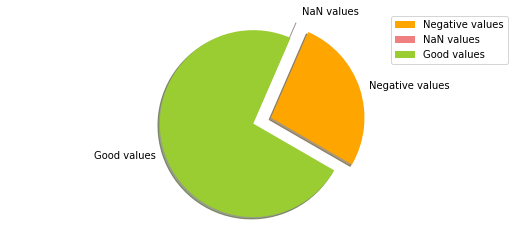

>>> 0.0 % of the values are NaNs.
>>> There are 32813592 cells in the DataFrame. Shape = (2343828, 14)


In [64]:
total_values = df.shape[0] * df.shape[1]
plot_corruption(total_values, total_nan_count, total_neg_count)